# Implementation Of The Finite Difference Scheme For The Diffusion Equation

## Algorithm

The system is

$$
    \newcommand{\qty}[1]
    {
        \left({#1}\right)
    }
    \newcommand{\qtys}[1]
    {
        \left[{#1}\right]
    }
$$     

\begin{align}
\label{eq:adimetional-diffusion-nernst}
    \frac{\partial \rho_+}{\partial \tau} &= \qty{\nabla^2 \rho_+ - \nabla\qty{\rho_+ \nabla \Psi}}, \\
    \frac{\partial \rho_-}{\partial \tau} &= \frac{\mathcal{D}_-}{\mathcal{D_+}}\qty{\nabla^2 \rho_- + \nabla\qty{\rho_- \nabla \Psi}}, \\
    \nabla^2 \Psi &= \kappa^2\qty{\rho_- - \rho_+}.
\end{align}


With boundary conditions

\begin{align}
    J_+(\xi = 0) &= -\mathcal{D}_+\kappa C_+\qty{\frac{\partial \rho_+}{\partial \xi} - \rho_+ \frac{\partial\Psi}{\partial \xi}}\bigg|_{x= 0}= -k_f C_+\rho_s(\xi = 0, \tau)\\
    J_-(\xi = 0) &= -\mathcal{D}_-\kappa C_-\qty{\frac{\partial \rho_-}{\partial x} + \rho_- \frac{\partial\Psi}{\partial \xi}}  \bigg|_{x= 0} = 0\\
    \rho_+(\delta) = 1\\
    \rho_-(\delta) = 1\\
    \Psi(\xi = 0) &= \frac{z\mathcal{F}}{RT} V_0 = \Psi_0\\
    \frac{\partial\Psi}{\partial x}(\xi = 1) &= 0
\end{align}




# Descrete equations

For each species ($s = \pm$) we have

\begin{align}
    C_s^{n+1, k} =& C_s^{n,k} \qty{1 - 2 \alpha + s \alpha \qty{\Psi^{n, k} - \Psi^{n, k-1}}} + \alpha C_s^{n, k+1} \qty{1 - s \qty{\Psi^{n,k+1} - \Psi^{n,k}}} + \alpha C_s^{n,k-1}.\\
    \Psi^{n+1, k+1} - 2\Psi^{n+1,k} + \Psi^{n+1, k-1} =& C_+^{n+1, k} - C_-^{n+1, k}
\end{align}






### Descritizing boundary conditions

Boundary conditions are drawn from the flux and can be found to be (in descrite form)

\begin{align}
\rho_s^{n+1, 0} &= \gamma_s \rho_s^{n+1, 1},\\
\rho_s^{n+1, M} &= 1,\\
\Psi^{n+1, 0} &= \Psi_0,\\
\Psi^{n+1, M} &= 0,\\
\Psi^{n+1, M} &= \Psi^{n+1, M-1} .
\end{align}

with

\begin{align}
\gamma_+ &= \frac{1}{1 + \frac{\Delta \xi}{\mathcal{D}_+}\frac{k_f}{\kappa} + \qty{\Psi^{n+1, 1}-\Psi^{n+1,0}} }, \\
\gamma_- &= \frac{1}{1 - \qty{\Psi^{n+1, 1}-\Psi^{n+1,0}} }
\end{align}

This equations yield the following boundary equations

$$ k=1 $$

\begin{align}
    \rho_s^{n+1, 1} = \rho_s^{n,1} \qty{1 - 2 \alpha_s + \alpha_s \gamma_s + s \alpha_s \qty{\Psi^{n, 1} - \Psi^{n, 0}}} + \alpha_s \rho_s^{n, 2} \qty{1 - s \qty{\Psi^{n,2} - \Psi^{n,1}}},\\
    \Psi^{n+1, 2} - 2\Psi^{n+1,1} + \Psi^{n+1, 0} =& \Delta \xi^2\qty{C_+^{n+1, 1} - C_-^{n+1, 1}}.
\end{align}


$$ k = m-1 $$

\begin{align}
    \rho_s^{n+1, m-1} = \rho_s^{n,m-1} \qty{1 - 2 \alpha_s + s \alpha_s \qty{\Psi^{n, m-1} - \Psi^{n, m-2}}} + \alpha_s \rho_s^{n, m} \qty{1 - s \qty{\Psi^{n,m} - \Psi^{n,m-1}}},\\
    \Psi^{n+1, 2} - 2\Psi^{n+1,1} + \Psi^{n+1, 0} = \Delta \xi^2 \qty{C_+^{n+1, 1} - C_-^{n+1, 1}}.  
\end{align}




### Matrix equations

We can write the system as follows

\begin{align}
\underline{\rho_s^{n+1}} = (\bf{A} + s\alpha_s\bf{B}(\Psi^{n}) ) \cdot \underline{\rho_s^{n}} + \bf{b_s}\\
\bf{D} \underline{\Psi}^{n+1} = \Delta \xi ^2\qty{\underline{\rho_-}^{n+1} - \underline{\rho_+}^{n+1}}- \underline{b}_{\Psi}
\end{align}


where

\begin{align}
A = \begin{bmatrix}
    1 - 2 \alpha + \alpha \gamma_s   &  \alpha   & 0  &   \cdots & 0   &   0   &   0   &   0 \\
    \alpha    &   1 - 2 \alpha       &  \alpha   & 0  & \cdots   & 0   &   0   &   0 \\
    0         & \alpha               &  1 - 2 \alpha  & \alpha   & \cdots   &   0   &   0   &   0 \\
    \vdots    &  \vdots              &\vdots          &  \vdots  & \vdots   &\vdots & \vdots & \vdots \\ 
    0         &  0                   &  \cdots        &  0       &  \alpha    &  1-2\alpha &    \alpha   &    0 \\
0         &  0                   &  \cdots        &  0           &  0         &     0      &  \alpha    &  1-2\alpha 
\end{bmatrix}
\end{align}

,

\begin{align}
B(\Psi) = \begin{bmatrix}
    \qty{\Psi^{n,1} - \Psi^{n, 0}}   &  -\qty{\Psi^{n,2} - \Psi^{n, 1}}   & 0  &   \cdots & 0   &   0   &   0   &   0 \\
    0                                &  \qty{\Psi^{n,1} - \Psi^{n, 0}}    & -\qty{\Psi^{n,2} - \Psi^{n, 1}}   & 0  & \cdots   & 0   &   0   &   0 \\
    0         & 0                    &  \qty{\Psi^{n,2} - \Psi^{n, 1}}    & -\qty{\Psi^{n,3} - \Psi^{n, 2}} & \cdots    &   0   &   0 \\
    \vdots    &  \vdots              &\vdots          &  \vdots  & \vdots   &\vdots & \vdots & \vdots \\ 
    0         &  0                   &  \cdots        &  0       &  0         &  0         & \qty{\Psi^{n,M-2} - \Psi^{n, M-3}}   & -\qty{\Psi^{n,M-1} - \Psi^{n, M-2}} \\
0         &  0                   &  \cdots        &  0           &  0         &     0      &  0    &  \qty{\Psi^{n,M-1} - \Psi^{n, M-2}}
\end{bmatrix}
\end{align}

and
\begin{align}
D = \begin{bmatrix}
    -2   &  1   & 0  &   \cdots & 0   &   0   &   0   &   0 \\
    1    &  -2    & 1   & 0  & \cdots   & 0   &   0   &   0 \\
    0         & 1                    &  -2   & 1 & \cdots    &   0   &   0 \\
    \vdots    &  \vdots              &\vdots          &  \vdots  & \vdots   &\vdots & \vdots & \vdots \\ 
    0         &  0                   &  \cdots        &  0       &  0         &  0         & -2   & 1 \\
0         &  0                   &  \cdots        &  0           &  0         &     0      &  1    &  -2
\end{bmatrix}.
\end{align}

\begin{align}
    b_\Psi = \begin{bmatrix}
        \Psi_0\\
        0\\
        \vdots\\
        0
    \end{bmatrix}
\end{align}

\begin{align}
    b_s = \begin{bmatrix}
        0\\
        0\\
        \vdots\\
        0\\
        1
    \end{bmatrix}
\end{align}

We define matrix $\bf{Z}$ as

\begin{align}
    Z_s = A_s + s\alpha B(\underline{\Psi})
\end{align}

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
import math
import matplotlib
import json

with open('model_parameters.json', 'r') as file:
    params = json.loads(file.read())


In [6]:
class Model():
    def __init__(self, params):
        #Model Parameters
        self.Cb = params['bulkConcentration']
        self.D1 = params['diffusionCoefficientCu']
        self.D2 = params['diffusionCoefficientSO4']
        self.d = params['laminarFlowRegion']
        self.kf = params['reactionRate']
        self.z = params['z']
        self.F = params['Fa']
        self.R = params['R']
        self.T = params['T']
        self.epsilon = params['epsilon']
        self.kappa =  np.sqrt(( ( self.z * self.F  ) ** 2 * self.Cb ) / ( self.epsilon * self.R * self.T ) )
        self.Psi0 = self.z * self.F * params['V0'] / ( self.R * self.T )
        self.to_molar = 1e3
        self.N = 100000
        self.M = 200
        self.xi = np.linspace(0,params["length"], self.M)
        self.tau = np.linspace(0,1, self.N) #shape is N+1

        #Grid Parameters
        self.dtau = 1/(self.N)  # N Partitions
        self.dxi = 1/(self.M) # N Partitions 
        self.a1 = self.dtau / self.dxi ** 2 
        self.a2 = self.dtau / self.dxi ** 2 * self.D2/self.D1

        #Plotting parameters

        
    def build(self):
        M = self.M
        N = self.N
        a1 = self.a1
        a2 = self.a2
        Psi0 = self.Psi0
        kappa = self.kappa
        kf = self.kf
        dxi = self.dxi
        D1 = self.D1 
        D2 = self.D2
        # Define the coefficient matrix
        g1 = 1 / ( 1 + kf * dxi / ( D1 * kappa ) +  Psi0)
        di1 = ( 1 - 2 * a1 ) * np.ones(M-2)
        di1[0] = ( 1 - 2 * a1 + a1 * g1 )
        A1 = diags(np.array([ a1 * np.ones(M-3), di1, a1 * np.ones(M-3)]), [-1, 0, 1], shape=(M-2, M-2)).toarray()

        g2 = 1 / ( 1 - Psi0 )
        di2 = ( 1 - 2 * a2 ) * np.ones(M-2)
        di2[0] = ( 1 - 2 * a2 + a2 * g2 )
        A2 = diags(np.array([ a2 * np.ones(M-3), di2, a2 * np.ones(M-3)]), [-1, 0, 1], shape=(M-2, M-2)).toarray()

        B1 = np.zeros([M-2, M-2])
        B2 = np.zeros([M-2, M-2])

        D0 = diags(np.array([ np.ones(M-3), -2 * np.ones(M-2), np.ones(M-3)]), [-1, 0, 1], shape=(M-2, M-2)).toarray()
        Dinv = np.asarray(np.linalg.inv(D0))

        b1 = np.zeros(M-2)
        b1[-1] = a1 
        b2 = np.zeros(M-2)
        b2[-1] = a2

        bPsi = np.zeros(M-2)
        bPsi[0] = Psi0

        def B(s, Psi, n):
            diag =  (Psi[n, 1:M-1 ] - Psi[n, 0:M-2 ])
            diag2 =  (Psi[n, 1:M-2 ] - Psi[n, 2:M-1 ])
            PsiMatrix = diags(np.array([ diag , diag2 ]), [0, 1], shape=(M-2, M-2)).toarray()
            if s == 1:
                return  -1 * a1 * PsiMatrix
            if s == -1:
                return a2 * PsiMatrix
        # Set up initial conditions for C

        rho1 = np.zeros([N, M])
        rho2 = np.zeros([N, M])
        Psi = np.zeros([N, M])

        rho1[0, :] = 0
        rho1[0, -1] = 1    

        rho2[0, :] = 0
        rho2[0, -1] = 1  

        Psi[0, :] = 0
        Psi[0, 0] = Psi0

        #Starting iteration
        for n in range(0, N-1):

             # Update border condition
            g1 = 1 / ( 1 + kf * dxi / ( D1 * kappa ) - (Psi[n,1]- Psi0))
            A1[0,0] = ( 1 - 2 * a1 + g1 * a1 )

            g2 = 1 / ( 1 + (Psi[n, 1] - Psi[n,0]))
            A2[0,0] = ( 1 - 2 * a2 + g2 * a2 )


            rho1[n+1, 1:M-1] = np.matmul(A1, rho1[n, 1:M-1])  + b1 + np.matmul(B(1, Psi, n), rho1[n, 1:M-1])
            rho1[n+1, 0] = g1 * rho1[n+1, 1]
            rho1[n+1, -1] = 1

            rho2[n+1, 1:M-1] = np.matmul(A2, rho2[n, 1:M-1]) + b2 + np.matmul(B(-1, Psi, n), rho2[n, 1:M-1]) 
            rho2[n+1, 0] = g2 * rho2[n+1, 1]
            rho2[n+1, -1] = 1

            Psi[n+1, 1:M-1] = np.matmul(Dinv, dxi * (rho2[n+1, 1:M-1] - rho1[n+1, 1:M-1]) -bPsi )
            Psi[n+1, 0] = Psi0
            Psi[n+1, -1] = 0
            
        print("Build Complete")
        self.rho1 = rho1
        self.rho2 = rho2
        self.Psi = Psi
        
    def remove_points(self, A, n):
        #n is the number of steps to skip
        if n >= 4:
            A = np.delete(A, [1, 2, 3])

        for i in range(0,int(len(A)/4)):
            index = i+n
            A = np.delete(A, [index-2, index-1, index])
        return A
        #Cm is the imported analytical solution


    def plot(self, t, plot, imageName='complete-diffusion-nernst'):
        self.imageName = imageName
        Cb = self.Cb
        dtau = self.dtau
        C1 =  self.to_molar * Cb * self.rho1
        C2 = self.to_molar * Cb * self.rho2
        phi = self.R * self.T * self.Psi / (self.z * self.F)
        kappa = self.kappa
        D1 = self.D1 
        mw = 4
        fs = 24
        skip = 4

        font = {'size'   : fs}
        matplotlib.rc('font', **font)
        
        #xi2 = remove_points(self.xi, skip) # this is done to avoid cluttering of numeric points over the analytic solution
        xi2 = self.xi # this is done to avoid cluttering of numeric points over the analytic solution
        #xi2 = xi2 * nanometerScale #change the scale of the scale to nanometer

        fig, ax1 = plt.subplots(figsize=(20,16))


        color = 'tab:red'
        ax1.tick_params(axis='y', labelcolor=color)
        ax2 = ax1.twinx() 
        color = 'tab:blue'

        plt.title('Comparing Numeric Solution To The Diffusion Reaction And Analytic Solution \n To The Diffusion-Only Problem', fontsize=fs, fontweight='bold')

        n = int(t/dtau)
        #print("Time: " + str(t / (D1 * kappa ** 2)) + "s")
        #ax1.plot(xi2, remove_points(C1[n, :], skip), 'g^', markersize=mw, label=r'$C_+$,  $\tau ='+str(t)+'$')
        #ax1.plot(xi2, remove_points(C2[n, :], skip), 'r^', markersize=mw, label=r'$C_-$,  $\tau ='+str(t)+'$')
        #ax1.legend(loc='upper left', fontsize = fs-4)
        #ax2.plot(xi2, remove_points(phi[n, :], skip), 'b^', markersize=mw, color='tab:blue', label=r'$\phi$,  $\tau ='+str(t)+'$')
        plt.grid(True, color= '#F2F2F2')
        ax1.plot(xi2, C1[n, :], 'g^', markersize=mw, label=r'$C_+$,  $\tau ='+str(t)+'$')
        ax1.plot(xi2, C2[n, :],'r^', markersize=mw, label=r'$C_-$,  $\tau ='+str(t)+'$')
        ax1.legend(loc='upper left', fontsize = fs-4)
        ax2.plot(xi2, phi[n, :], 'b^', markersize=mw, color='tab:blue', label=r'$\phi$,  $\tau ='+str(t)+'$')

        ax1.set_xlabel(r'Distance from the interface plate (nm)', fontsize=fs+5)
        ax1.set_ylabel(r'Molar Concentration', fontsize=fs+5)
        ax2.set_ylabel(r'Electric Potential (V)', fontsize=fs+5)
        ax2.tick_params(axis='y', labelcolor=color)

        #plt.text(0.9, 40, r'Reaction Rate', fontsize = 14, color = 'black')
        #plt.text(0.9, 37, r'$r = - 1.5 \times 10 \frac{A}{m^2}$', fontsize = 14, color = 'black')
        plt.legend(loc='upper right', fontsize = fs-4)
        if(plot):
            plt.savefig('../../../img/'+ self.imageName +'.eps', format='eps', dpi=1000, fontsize=fs, fontweight='bold')
            print('../../../img/'+ self.imageName +'.eps')
            
        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        
    
        plt.show()



            
    



# Numeric Solution Testing

We build the model for the following set of parameters

In [7]:
params0 = params
params0['bulkConcentration'] = 1e-3


model0 = Model(params0)

In [8]:
model0.build()

Build Complete


../../../img/complete-diffusion-nernst.eps


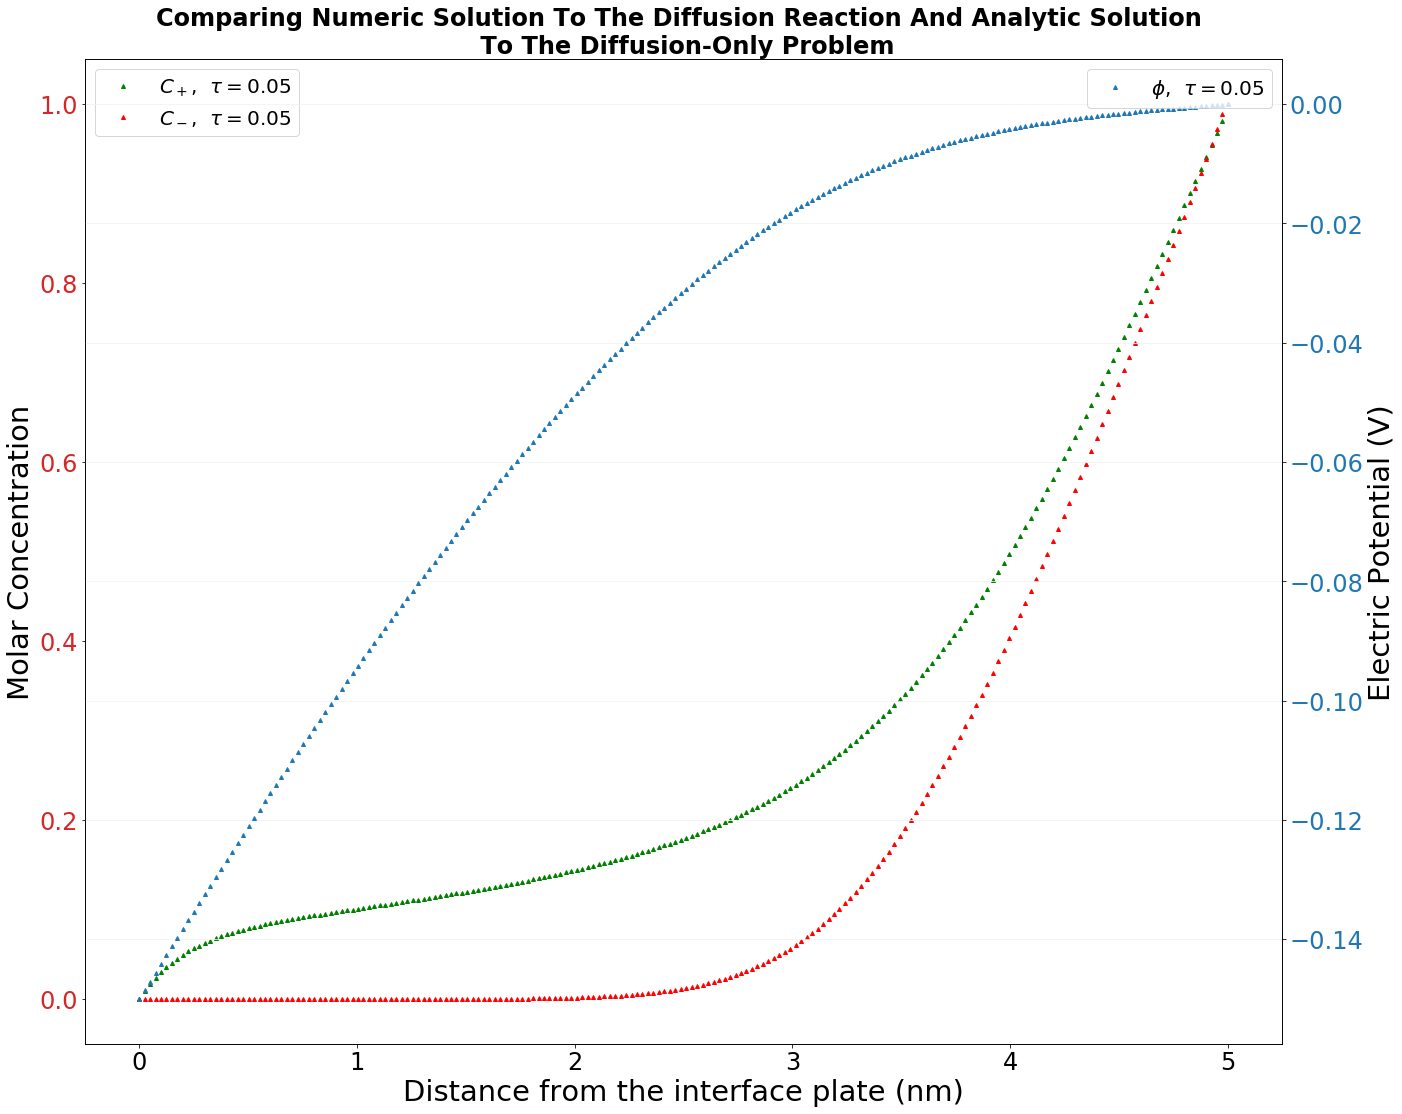

In [9]:
model0.plot(0.05, 1)

## Reducing to know limit

In the case of small reaction rate ($k_f$) values and large ione force we approach the limmit of low electric field interaction and we should get back the behaviour of a purely diffusive process



In [ ]:
factor = 1/80.9
params1 = params
params1['epsilon'] = factor * params["epsilon"]

model1 = Model(params1)
print(model1.kappa/model1.kf)

In [ ]:
model1.build()


In [ ]:
model1.plot(0.1, 1, "complete-no-electric-field")

In [7]:
#Equilibrium constant
np.exp(params['z'] * params['Fa'] * params['V0'] / (params['R'] * params['T']))

9.124886283003189e-06